# Credit Risk Modelling - Loan Classification


# Import relevant Libraries/Modules

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

# Load the Dataset

In [9]:
df = pd.read_csv("./loan_detection.csv")
df.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


# Basic EDA

In [10]:
df.shape

(41188, 60)

In [11]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [13]:
df.nunique()

age                              78
campaign                         42
pdays                            27
previous                          8
no_previous_contact               2
not_working                       2
job_admin.                        2
job_blue-collar                   2
job_entrepreneur                  2
job_housemaid                     2
job_management                    2
job_retired                       2
job_self-employed                 2
job_services                      2
job_student                       2
job_technician                    2
job_unemployed                    2
job_unknown                       2
marital_divorced                  2
marital_married                   2
marital_single                    2
marital_unknown                   2
education_basic.4y                2
education_basic.6y                2
education_basic.9y                2
education_high.school             2
education_illiterate              2
education_professional.cours

In [14]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

# Handling Missing Value

In [15]:
df.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

In [16]:
round(df.isnull().mean() * 100, 2)


age                              0.0
campaign                         0.0
pdays                            0.0
previous                         0.0
no_previous_contact              0.0
not_working                      0.0
job_admin.                       0.0
job_blue-collar                  0.0
job_entrepreneur                 0.0
job_housemaid                    0.0
job_management                   0.0
job_retired                      0.0
job_self-employed                0.0
job_services                     0.0
job_student                      0.0
job_technician                   0.0
job_unemployed                   0.0
job_unknown                      0.0
marital_divorced                 0.0
marital_married                  0.0
marital_single                   0.0
marital_unknown                  0.0
education_basic.4y               0.0
education_basic.6y               0.0
education_basic.9y               0.0
education_high.school            0.0
education_illiterate             0.0
e

In [17]:
df.duplicated().sum()

2417

In [18]:
df[df.duplicated()]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
10,41,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
11,25,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
16,35,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
31,59,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
104,52,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40928,21,1,999,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
41131,58,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
41167,32,3,999,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
41172,31,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


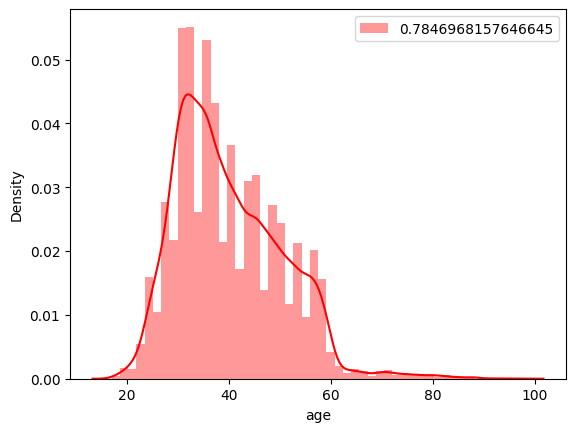

In [19]:
sns.distplot(df['age'], color='r', label=df.age.skew())
plt.legend()


In [20]:
df.age.mean()

40.02406040594348

In [21]:
df.age.median()

38.0

In [22]:
for i in df:
    if df[i].isna().sum() > 0:
        print(f' {i} : {df[i].mean()}')
        df[i].fillna(df[i].mean(), inplace=True)

# Duplicate Data

In [23]:
df.drop_duplicates(keep="first", inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df[df.duplicated()]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label


In [26]:
df.shape

(38771, 60)

# Outliers or Anomalies

## Using IQR - Inter Quartile Range

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

age                              15.0
campaign                          2.0
pdays                             0.0
previous                          0.0
no_previous_contact               0.0
not_working                       0.0
job_admin.                        0.0
job_blue-collar                   0.0
job_entrepreneur                  0.0
job_housemaid                     0.0
job_management                    0.0
job_retired                       0.0
job_self-employed                 0.0
job_services                      0.0
job_student                       0.0
job_technician                    0.0
job_unemployed                    0.0
job_unknown                       0.0
marital_divorced                  0.0
marital_married                   1.0
marital_single                    1.0
marital_unknown                   0.0
education_basic.4y                0.0
education_basic.6y                0.0
education_basic.9y                0.0
education_high.school             0.0
education_il

In [28]:
print(Q1 - 1.5 * IQR)
print()
print(Q3 + 1.5 * IQR)

age                                9.5
campaign                          -2.0
pdays                            999.0
previous                           0.0
no_previous_contact                1.0
not_working                        0.0
job_admin.                         0.0
job_blue-collar                    0.0
job_entrepreneur                   0.0
job_housemaid                      0.0
job_management                     0.0
job_retired                        0.0
job_self-employed                  0.0
job_services                       0.0
job_student                        0.0
job_technician                     0.0
job_unemployed                     0.0
job_unknown                        0.0
marital_divorced                   0.0
marital_married                   -1.5
marital_single                    -1.5
marital_unknown                    0.0
education_basic.4y                 0.0
education_basic.6y                 0.0
education_basic.9y                 0.0
education_high.school    

In [29]:
lower_bound = (Q1 - 1.5  * IQR)
upper_bound = (Q3 + 1.5 * IQR)


In [30]:
upper_bound

age                               69.5
campaign                           6.0
pdays                            999.0
previous                           0.0
no_previous_contact                1.0
not_working                        0.0
job_admin.                         0.0
job_blue-collar                    0.0
job_entrepreneur                   0.0
job_housemaid                      0.0
job_management                     0.0
job_retired                        0.0
job_self-employed                  0.0
job_services                       0.0
job_student                        0.0
job_technician                     0.0
job_unemployed                     0.0
job_unknown                        0.0
marital_divorced                   0.0
marital_married                    2.5
marital_single                     2.5
marital_unknown                    0.0
education_basic.4y                 0.0
education_basic.6y                 0.0
education_basic.9y                 0.0
education_high.school    

In [31]:
df.shape

(38771, 60)

In [32]:

Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)


In [33]:
IQR = Q3 - Q1
IQR

15.0

In [34]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [35]:
lower_bound


9.5

In [36]:
upper_bound


69.5

In [37]:
df_filtered = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]


In [38]:
print(f"Q1: {Q1}, Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Q1: 32.0, Q3: 47.0
IQR: 15.0
Lower Bound: 9.5
Upper Bound: 69.5


In [39]:
df_filtered

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,2,999,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41182,29,1,9,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


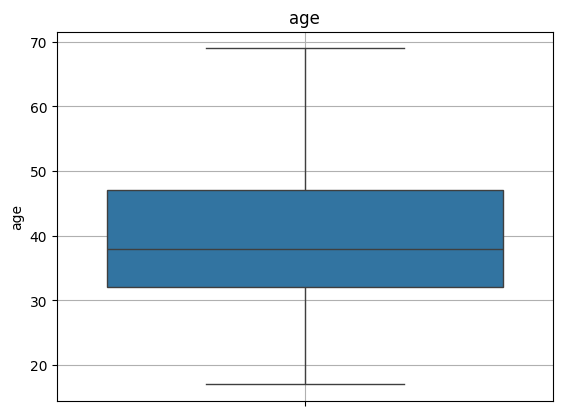

In [40]:
sns.boxplot(df_filtered['age'])
plt.title("age")
plt.grid()
plt.show()


In [41]:
df=  df_filtered
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,2,999,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41182,29,1,9,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


# Feature Selection

In [42]:
corr_matrix = df.corr()
corr_matrix

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
age,1.000000,0.010066,0.007008,-0.025589,0.007062,0.104183,-0.079238,-0.008970,0.038534,0.083795,...,0.002033,0.007443,0.021426,-0.021091,0.015010,-0.022740,-0.026651,0.026140,-0.004742,-0.022105
campaign,0.010066,1.000000,0.056404,-0.086045,0.056386,-0.014212,0.014212,-0.001496,-0.004649,0.002668,...,-0.035082,0.025347,0.009435,0.008502,-0.022871,-0.020652,-0.075592,0.095532,-0.054634,-0.072041
pdays,0.007008,0.056404,1.000000,-0.582789,0.999992,-0.091269,-0.034821,0.063590,0.019040,0.002466,...,-0.157506,0.016316,0.001188,-0.009174,-0.005305,-0.002725,0.006908,0.487108,-0.949831,-0.318589
previous,-0.025589,-0.086045,-0.582789,1.000000,-0.582737,0.077921,0.030180,-0.052354,-0.013706,-0.015794,...,0.156739,0.002871,-0.002120,0.000868,-0.000369,-0.001192,0.687826,-0.880192,0.518177,0.221417
no_previous_contact,0.007062,0.056386,0.999992,-0.582737,1.000000,-0.091280,-0.034833,0.063583,0.019042,0.002474,...,-0.157510,0.016302,0.001169,-0.009170,-0.005291,-0.002710,0.006653,0.487112,-0.949401,-0.318552
not_working,0.104183,-0.014212,-0.091269,0.077921,-0.091280,1.000000,-0.172121,-0.160636,-0.057927,-0.048565,...,0.064181,0.002512,-0.005559,-0.002485,0.006403,-0.000641,0.019341,-0.060288,0.083005,0.089005
job_admin.,-0.079238,0.014212,-0.034821,0.030180,-0.034833,-0.172121,1.000000,-0.313195,-0.112942,-0.094688,...,0.017549,0.007943,-0.000799,-0.003645,0.000236,-0.003563,0.008730,-0.025509,0.034186,0.043273
job_blue-collar,-0.008970,-0.001496,0.063590,-0.052354,0.063583,-0.160636,-0.313195,1.000000,-0.105405,-0.088370,...,-0.052307,0.002716,-0.010154,-0.007839,-0.003660,0.019358,-0.011911,0.041534,-0.059601,-0.070334
job_entrepreneur,0.038534,-0.004649,0.019040,-0.013706,0.019042,-0.057927,-0.112942,-0.105405,1.000000,-0.031867,...,-0.008021,-0.000667,0.005220,0.004655,-0.005375,-0.004079,0.000264,0.008559,-0.016935,-0.017130
job_housemaid,0.083795,0.002668,0.002466,-0.015794,0.002474,-0.048565,-0.094688,-0.088370,-0.031867,1.000000,...,-0.006047,-0.007947,0.003739,-0.008116,0.009427,0.002933,-0.020505,0.019323,-0.002129,-0.010230


# Model Building

## Split the Independent and Dependent Data

In [43]:
X = df.iloc[:, :-1]
X

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,2,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41182,29,1,9,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [44]:
y = df['Loan_Status_label']
y

0        0
1        0
2        0
3        0
4        0
        ..
41180    0
41182    0
41184    0
41185    0
41186    1
Name: Loan_Status_label, Length: 38314, dtype: int64

In [45]:
y.value_counts()

Loan_Status_label
0    33939
1     4375
Name: count, dtype: int64

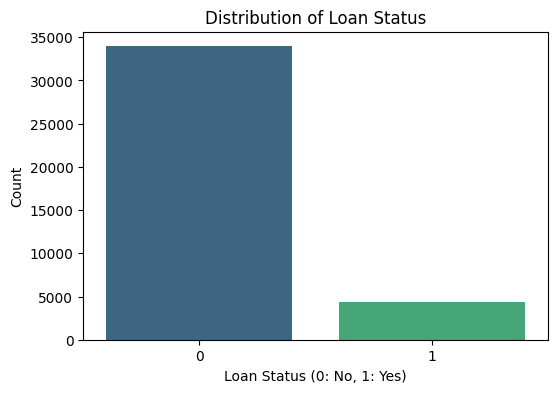

In [80]:
y = df['Loan_Status_label'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=y.index, y=y.values, palette='viridis')
plt.xlabel('Loan Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

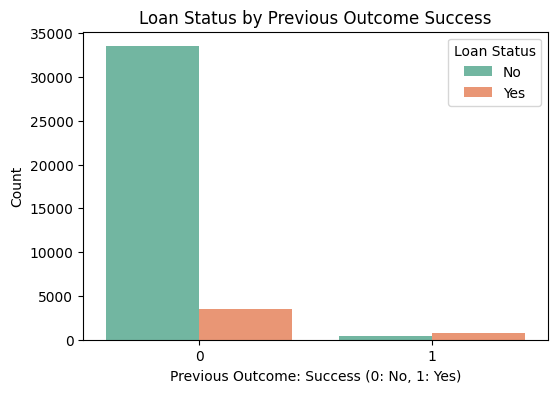

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(x='poutcome_success', hue='Loan_Status_label', data=df, palette='Set2')
plt.xlabel('Previous Outcome: Success (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Loan Status by Previous Outcome Success')
plt.legend(title='Loan Status', labels=['No', 'Yes'])
plt.show()


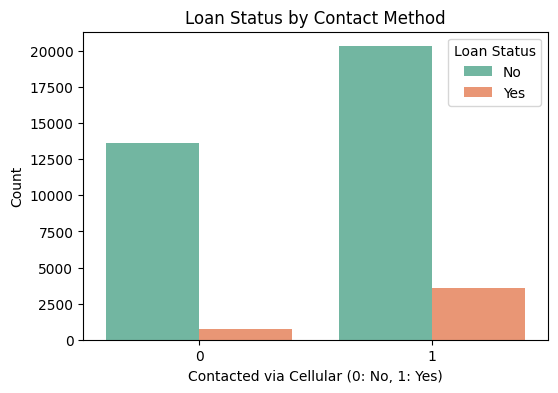

In [48]:

plt.figure(figsize=(6,4))
sns.countplot(x='contact_cellular', hue='Loan_Status_label', data=df, palette='Set2')
plt.xlabel('Contacted via Cellular (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Loan Status by Contact Method')
plt.legend(title='Loan Status', labels=['No', 'Yes'])
plt.show()

## Split data into Training and Test Set

In [49]:

X_train, X_test, y_train , y_test = train_test_split(X, y , test_size=0.2, random_state=42)


In [50]:
X_train


,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
38446,64,1,999,1,1,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
16109,23,1,999,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1320,37,2,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
29221,44,1,999,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8319,39,12,999,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,35,2,999,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
11843,31,3,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41026,65,2,12,1,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
885,43,1,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [51]:
X_test

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
21256,41,3,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
26340,44,1,999,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
15626,60,3,999,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
37031,23,1,999,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
36150,32,1,999,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34886,53,1,999,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
22433,29,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
36847,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
14411,39,2,999,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


# Feature Scaling

In [52]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [53]:
X_test_sc

array([[ 0.13398938,  0.11414988,  0.19903267, ..., -0.34189557,
         0.40241877, -0.1896326 ],
       [ 0.44214084, -0.555885  ,  0.19903267, ..., -0.34189557,
         0.40241877, -0.1896326 ],
       [ 2.08561527,  0.11414988,  0.19903267, ..., -0.34189557,
         0.40241877, -0.1896326 ],
       ...,
       [-0.27687922, -0.555885  ,  0.19903267, ..., -0.34189557,
         0.40241877, -0.1896326 ],
       [-0.07144492, -0.22086756,  0.19903267, ..., -0.34189557,
         0.40241877, -0.1896326 ],
       [ 1.46931236,  0.11414988,  0.19903267, ..., -0.34189557,
         0.40241877, -0.1896326 ]])

In [54]:
X_train_sc

array([[ 2.49272944, -0.58448757,  0.1951058 , ...,  2.90313209,
        -2.48695613, -0.18506455],
       [-1.72043172, -0.58448757,  0.1951058 , ..., -0.34445556,
         0.40209797, -0.18506455],
       [-0.28179132, -0.22804563,  0.1951058 , ..., -0.34445556,
         0.40209797, -0.18506455],
       ...,
       [ 2.59548947, -0.22804563, -5.09317464, ..., -0.34445556,
        -2.48695613,  5.40352011],
       [ 0.33476884, -0.58448757,  0.1951058 , ..., -0.34445556,
         0.40209797, -0.18506455],
       [ 0.33476884, -0.22804563,  0.1951058 , ..., -0.34445556,
         0.40209797, -0.18506455]])

# Model Selection

## Using Logistic Regression

In [55]:
lr = LogisticRegression()
lr.fit(X_train , y_train)

LogisticRegression()

In [56]:
print(f'Training Accuracy : {lr.score(X_train, y_train)}')
print(f'Test Accuracy : {lr.score(X_test, y_test)}')


Training Accuracy : 0.8957293399889074
Test Accuracy : 0.8970377136891556


In [57]:
# On Scaled Data

lr = LogisticRegression()
lr.fit(X_train_sc, y_train)


LogisticRegression()

In [58]:
print(f'Training Accuracy : {lr.score(X_train_sc, y_train)}')
print(f'Test Accuracy : {lr.score(X_test_sc, y_test)}')


Training Accuracy : 0.8957945907148217
Test Accuracy : 0.8941667754143285


## Using DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [60]:
print(f'Training Accuracy : {dt.score(X_train, y_train)}')
print(f'Test Accuracy : {dt.score(X_test, y_test)}')


Training Accuracy : 0.8984372451143519
Test Accuracy : 0.8948192613858802


## Using RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
print(f'Training Accuracy : {rfc.score(X_train, y_train)}')
print(f'Test Accuracy : {rfc.score(X_test, y_test)}')


Training Accuracy : 0.9928224201494241
Test Accuracy : 0.885814954978468


## Using XGBClassifier

In [63]:
xgb = XGBClassifier(gamma=0.7, reg_alpha=0.5, reg_lambda=0.2)
xgb.fit(X_train ,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
print(f'Training Accuracy : {xgb.score(X_train, y_train)}')
print(f'Test Accuracy : {xgb.score(X_test, y_test)}')


Training Accuracy : 0.9065935858536426
Test Accuracy : 0.8957327417460524


In [65]:
y_pred_xgtr = xgb.predict(X_train)
y_pred_xgts = xgb.predict(X_test)


In [66]:
X_train[:3]


,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
38446,64,1,999,1,1,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
16109,23,1,999,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1320,37,2,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [67]:
y_train[:3]


38446    1
16109    0
1320     0
Name: Loan_Status_label, dtype: int64

In [68]:
y_pred_xgtr[:3]


array([1, 0, 0])

In [69]:
confusion_matrix(y_train, y_pred_xgtr)


array([[26822,   318],
       [ 2545,   966]], dtype=int64)

<Axes: >

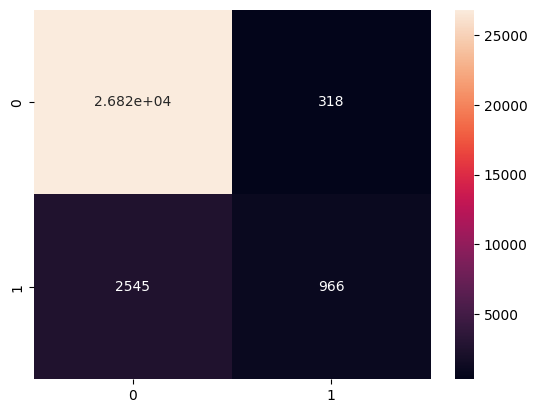

In [70]:
sns.heatmap(confusion_matrix(y_train, y_pred_xgtr), annot=True, fmt='.4g')


In [71]:
accuracy_score(y_train, y_pred_xgtr)


0.9065935858536426

In [72]:
print(classification_report(y_train, y_pred_xgtr))


              precision    recall  f1-score   support

           0       0.91      0.99      0.95     27140
           1       0.75      0.28      0.40      3511

    accuracy                           0.91     30651
   macro avg       0.83      0.63      0.68     30651
weighted avg       0.89      0.91      0.89     30651



In [73]:
#TEST

confusion_matrix(y_test, y_pred_xgts)


array([[6667,  132],
       [ 667,  197]], dtype=int64)

<Axes: >

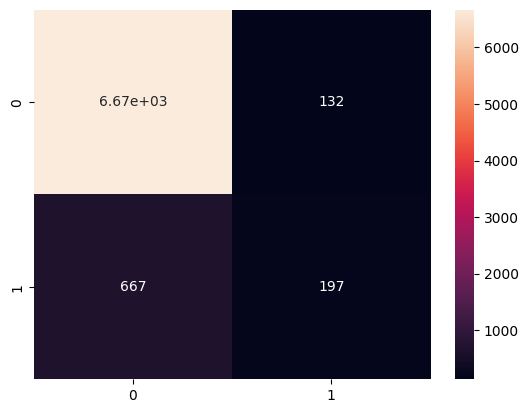

In [74]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgts), annot=True, fmt='.3g')


In [75]:
accuracy_score(y_test, y_pred_xgts)


0.8957327417460524

# Hyperparameter Tuning

In [76]:
parameters = {
    'n_estimators' : [100, 200],
    'learning_rate' : [0.1,0.01,1.0,0.05],
    'max_depth' : [3,4,5],
    'gamma' : [0.2,0.3],
    'reg_alpha' : [0.1,1,0.2],
    'reg_lambda' : [0.1,1]    
}

parameters


{'n_estimators': [100, 200],
 'learning_rate': [0.1, 0.01, 1.0, 0.05],
 'max_depth': [3, 4, 5],
 'gamma': [0.2, 0.3],
 'reg_alpha': [0.1, 1, 0.2],
 'reg_lambda': [0.1, 1]}

In [77]:
# perform GridSearchCV

grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, scoring='accuracy', cv=5, verbose=3)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.897 total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.896 total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.896 total time=   0.1s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.896 total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.893 total time=   0.1s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.897 total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.896 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.7,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2, 0.3],
                         'learning_rate': [0.1, 0.01, 1.0, 0.05],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'reg_alpha': [0.1, 1, 0.2], 'reg_lambda': [0.1, 1]},
             scoring='accuracy', verbose=3)

In [78]:
print(f'Best Selected Hyperparamters : \n\n{grid_search.best_params_}\n')

print(f'Best Estimators : \n\n{grid_search.best_estimator_}')


Best Selected Hyperparamters : 

{'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 0.1}

Best Estimators : 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [79]:

print(f'Training Accuracy : {grid_search.score(X_train, y_train)}')
print(f'Test Accuracy : {grid_search.score(X_test, y_test)}')


Training Accuracy : 0.8989918762846236
Test Accuracy : 0.8972987080777763
